# Music Genre Prediction - Support Vector Machine
### Tristan Sherman
CPE 695
Spring 2023

# TL;DR

In [1]:
import pandas as pd

# Pull Data
TRAINING_DATA_PATH = 'C:/Users/Tristan/Documents/Stevens Institute/CPE695/Project/Processed_Data/Iteration_2/training_data_Final.csv'
TEST_DATA_PATH = 'C:/Users/Tristan/Documents/Stevens Institute/CPE695/Project/Processed_Data/Iteration_2/test_data_Final.csv'

def load_data(data_path):
    return pd.read_csv(data_path)

music_train = load_data(TRAINING_DATA_PATH)
music_test = load_data(TEST_DATA_PATH)

# Split Data
ytrain_num = music_train["Genre"].to_numpy()
X_train = music_train.iloc[:, 1:].to_numpy()
ytest_num = music_test["Genre"].to_numpy()
X_test = music_test.iloc[:, 1:].to_numpy()

In [2]:
# Train Model
from sklearn import svm

svm_clf = svm.SVC(kernel='rbf', C=100, gamma='scale')
svm_clf.fit(X_train, ytrain_num)
svm_clf.score(X_test, ytest_num)

0.3541390897057326

# Begin Formal Discussion

First collect previously cleaned dataset

In [7]:
import pandas as pd

TRAINING_DATA_PATH = 'C:/Users/Tristan/Documents/Stevens Institute/CPE695/Project/Processed_Data/Iteration_2/training_data_Final.csv'
TEST_DATA_PATH = 'C:/Users/Tristan/Documents/Stevens Institute/CPE695/Project/Processed_Data/Iteration_2/test_data_Final.csv'

def load_data(data_path):
    return pd.read_csv(data_path)

music_train = load_data(TRAINING_DATA_PATH)
music_test = load_data(TEST_DATA_PATH)
#music_train.head()
music_train.info()
music_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39283 entries, 0 to 39282
Columns: 190 entries, Genre to Segment Timbre 12-12 Covariance
dtypes: float64(190)
memory usage: 56.9 MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9821 entries, 0 to 9820
Columns: 190 entries, Genre to Segment Timbre 12-12 Covariance
dtypes: float64(190)
memory usage: 14.2 MB


### Create Subset for Speed

In [8]:
music_train_subset = music_train.sample(frac=0.25, replace=True, random_state=1)
music_test_subset = music_test.sample(frac=0.25, replace=True, random_state=1)
music_train_subset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9821 entries, 33003 to 33867
Columns: 190 entries, Genre to Segment Timbre 12-12 Covariance
dtypes: float64(190)
memory usage: 14.3 MB


# Split data

In [9]:
# Training data
ytrain_num = music_train["Genre"].to_numpy()
#ytrain_1hot = music_train.iloc[:, 1:50].to_numpy()
X_train = music_train.iloc[:, 1:].to_numpy()

# Test data
ytest_num = music_test["Genre"].to_numpy()
#ytest_1hot = music_test.iloc[:, 1:50].to_numpy()
X_test = music_test.iloc[:, 1:].to_numpy()

#display(len(X_test[0]))

#### Split Subset

In [10]:
ytrain_subs = music_train_subset["Genre"].to_numpy()
X_train_subs = music_train_subset.iloc[:, 1:].to_numpy()

# Test data
ytest_subs = music_test_subset["Genre"].to_numpy()
X_test_subs = music_test_subset.iloc[:, 1:].to_numpy()

# Exploration of LinearSVC Models

In [5]:
from sklearn.svm import LinearSVC

lin_svm_clf = LinearSVC(C=1, loss="hinge")
lin_svm_clf.fit(X_train, ytrain_num)
lin_svm_clf.score(X_test, ytest_num)

C:\Users\Tristan\.conda\envs\CPE695\lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


0.19896140922512984

Now that we have seen the full model's accuracy, compare against subset accuracy

In [10]:
from sklearn.svm import LinearSVC
lin_svm_subs_clf = LinearSVC(C=1, loss="hinge")
lin_svm_subs_clf.fit(X_train_subs, ytrain_subs)
lin_svm_subs_clf.score(X_test_subs, ytest_subs)

C:\Users\Tristan\.conda\envs\CPE695\lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


0.24765784114052952

Also see how limiting the iterations affects the accuracy

In [11]:
lin_svm_subs_clf2 = LinearSVC(C=1, loss="hinge", max_iter=100)
lin_svm_subs_clf2.fit(X_train_subs, ytrain_subs)
lin_svm_subs_clf2.score(X_test_subs, ytest_subs)

C:\Users\Tristan\.conda\envs\CPE695\lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


0.22932790224032587

### Explore hyperparameter space on LinearSVC subset

In [15]:
from sklearn.model_selection import GridSearchCV
  
# defining parameter range
linsvm_param_grid = {'C': [0.1, 1, 10, 100, 1000],
              'max_iter': [100]} 
  
linsvm_grid = GridSearchCV(LinearSVC(), linsvm_param_grid, refit = True, verbose = 3)
  
# fitting the model for grid search
linsvm_grid.fit(X_train_subs, ytrain_subs)

Fitting 5 folds for each of 5 candidates, totalling 25 fits


C:\Users\Tristan\.conda\envs\CPE695\lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 1/5] END ...............C=0.1, max_iter=100;, score=0.343 total time=   8.2s


C:\Users\Tristan\.conda\envs\CPE695\lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 2/5] END ...............C=0.1, max_iter=100;, score=0.335 total time=   8.3s


C:\Users\Tristan\.conda\envs\CPE695\lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 3/5] END ...............C=0.1, max_iter=100;, score=0.349 total time=   8.1s


C:\Users\Tristan\.conda\envs\CPE695\lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 4/5] END ...............C=0.1, max_iter=100;, score=0.359 total time=   8.2s


C:\Users\Tristan\.conda\envs\CPE695\lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 5/5] END ...............C=0.1, max_iter=100;, score=0.349 total time=   8.3s


C:\Users\Tristan\.conda\envs\CPE695\lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 1/5] END .................C=1, max_iter=100;, score=0.265 total time=   9.7s


C:\Users\Tristan\.conda\envs\CPE695\lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 2/5] END .................C=1, max_iter=100;, score=0.248 total time=   9.8s


C:\Users\Tristan\.conda\envs\CPE695\lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 3/5] END .................C=1, max_iter=100;, score=0.258 total time=  10.7s


C:\Users\Tristan\.conda\envs\CPE695\lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 4/5] END .................C=1, max_iter=100;, score=0.231 total time=  10.4s


C:\Users\Tristan\.conda\envs\CPE695\lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 5/5] END .................C=1, max_iter=100;, score=0.221 total time=  10.3s


C:\Users\Tristan\.conda\envs\CPE695\lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 1/5] END ................C=10, max_iter=100;, score=0.221 total time=   9.7s


C:\Users\Tristan\.conda\envs\CPE695\lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 2/5] END ................C=10, max_iter=100;, score=0.206 total time=  10.8s


C:\Users\Tristan\.conda\envs\CPE695\lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 3/5] END ................C=10, max_iter=100;, score=0.224 total time=  10.2s


C:\Users\Tristan\.conda\envs\CPE695\lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 4/5] END ................C=10, max_iter=100;, score=0.193 total time=  10.9s


C:\Users\Tristan\.conda\envs\CPE695\lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 5/5] END ................C=10, max_iter=100;, score=0.242 total time=  10.6s


C:\Users\Tristan\.conda\envs\CPE695\lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 1/5] END ...............C=100, max_iter=100;, score=0.154 total time=  10.1s


C:\Users\Tristan\.conda\envs\CPE695\lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 2/5] END ...............C=100, max_iter=100;, score=0.192 total time=   9.8s


C:\Users\Tristan\.conda\envs\CPE695\lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 3/5] END ...............C=100, max_iter=100;, score=0.217 total time=  10.0s


C:\Users\Tristan\.conda\envs\CPE695\lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 4/5] END ...............C=100, max_iter=100;, score=0.259 total time=  11.0s


C:\Users\Tristan\.conda\envs\CPE695\lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 5/5] END ...............C=100, max_iter=100;, score=0.216 total time=   9.7s


C:\Users\Tristan\.conda\envs\CPE695\lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 1/5] END ..............C=1000, max_iter=100;, score=0.238 total time=  10.0s


C:\Users\Tristan\.conda\envs\CPE695\lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 2/5] END ..............C=1000, max_iter=100;, score=0.205 total time=  10.1s


C:\Users\Tristan\.conda\envs\CPE695\lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 3/5] END ..............C=1000, max_iter=100;, score=0.234 total time=  10.1s


C:\Users\Tristan\.conda\envs\CPE695\lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 4/5] END ..............C=1000, max_iter=100;, score=0.211 total time=  10.3s


C:\Users\Tristan\.conda\envs\CPE695\lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 5/5] END ..............C=1000, max_iter=100;, score=0.202 total time=  10.0s


C:\Users\Tristan\.conda\envs\CPE695\lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


GridSearchCV(estimator=LinearSVC(),
             param_grid={'C': [0.1, 1, 10, 100, 1000], 'max_iter': [100]},
             verbose=3)

In [18]:
linsvm_grid.best_params_
linsvm_grid.best_estimator_

LinearSVC(C=0.1, max_iter=100)

In [21]:
import warnings
warnings.filterwarnings("ignore")

It appears that lower C values perform better. Let's explore that space more

In [22]:
# defining parameter range
linsvm_param_grid2 = {'C': [0.001, 0.005, 0.01, 0.05, 0.1],
              'max_iter': [100]} 
  
linsvm_grid2 = GridSearchCV(LinearSVC(), linsvm_param_grid2, refit = True, verbose = 3)
  
# fitting the model for grid search
linsvm_grid2.fit(X_train_subs, ytrain_subs)
linsvm_grid2.best_params_
linsvm_grid2.best_estimator_

Fitting 5 folds for each of 5 candidates, totalling 25 fits
[CV 1/5] END .............C=0.001, max_iter=100;, score=0.330 total time=   4.3s
[CV 2/5] END .............C=0.001, max_iter=100;, score=0.320 total time=   4.3s
[CV 3/5] END .............C=0.001, max_iter=100;, score=0.344 total time=   2.8s
[CV 4/5] END .............C=0.001, max_iter=100;, score=0.330 total time=   4.4s
[CV 5/5] END .............C=0.001, max_iter=100;, score=0.332 total time=   4.2s
[CV 1/5] END .............C=0.005, max_iter=100;, score=0.340 total time=   5.5s
[CV 2/5] END .............C=0.005, max_iter=100;, score=0.329 total time=   5.3s
[CV 3/5] END .............C=0.005, max_iter=100;, score=0.350 total time=   5.4s
[CV 4/5] END .............C=0.005, max_iter=100;, score=0.343 total time=   5.5s
[CV 5/5] END .............C=0.005, max_iter=100;, score=0.346 total time=   5.4s
[CV 1/5] END ..............C=0.01, max_iter=100;, score=0.342 total time=   5.6s
[CV 2/5] END ..............C=0.01, max_iter=100;,

LinearSVC(C=0.05, max_iter=100)

We found a model that performs well on the subset. Let's see how this works on the full model.

In [25]:
# Attempt full model with modified hyperparameter
from sklearn.svm import LinearSVC

lin_svm_clf = LinearSVC(C=0.05, loss="hinge")
lin_svm_clf.fit(X_train, ytrain_num)
lin_svm_clf.score(X_test, ytest_num)

0.20934731697383158

Hm. Disappointing... Maybe running the subset makes extending the model difficult

### Let's try to explore the hyperparameter space on the full dataset with LinearSVM

In [26]:
from sklearn.model_selection import GridSearchCV
  
# defining parameter range
linsvm_param_grid_full = {'C': [0.1, 1, 10, 100, 1000],
              'max_iter': [100]} 
  
linsvm_grid_full = GridSearchCV(LinearSVC(), linsvm_param_grid_full, refit = True, verbose = 3)
  
# fitting the model for grid search
linsvm_grid_full.fit(X_train, ytrain_num)

Fitting 5 folds for each of 5 candidates, totalling 25 fits
[CV 1/5] END ...............C=0.1, max_iter=100;, score=0.355 total time=  50.4s
[CV 2/5] END ...............C=0.1, max_iter=100;, score=0.344 total time=  53.4s
[CV 3/5] END ...............C=0.1, max_iter=100;, score=0.353 total time=  49.3s
[CV 4/5] END ...............C=0.1, max_iter=100;, score=0.348 total time=  50.8s
[CV 5/5] END ...............C=0.1, max_iter=100;, score=0.350 total time=  51.7s
[CV 1/5] END .................C=1, max_iter=100;, score=0.204 total time=  51.9s
[CV 2/5] END .................C=1, max_iter=100;, score=0.198 total time=  55.9s
[CV 3/5] END .................C=1, max_iter=100;, score=0.242 total time=  59.8s
[CV 4/5] END .................C=1, max_iter=100;, score=0.238 total time=  59.2s
[CV 5/5] END .................C=1, max_iter=100;, score=0.241 total time=  56.8s
[CV 1/5] END ................C=10, max_iter=100;, score=0.172 total time=  52.1s
[CV 2/5] END ................C=10, max_iter=100;,

GridSearchCV(estimator=LinearSVC(),
             param_grid={'C': [0.1, 1, 10, 100, 1000], 'max_iter': [100]},
             verbose=3)

In [28]:
display(linsvm_grid_full.best_params_)
display(linsvm_grid_full.best_estimator_)

{'C': 0.1, 'max_iter': 100}

LinearSVC(C=0.1, max_iter=100)

In [15]:
from sklearn.svm import LinearSVC
# Attempt full model with modified hyperparameter
lin_svm_clf2 = LinearSVC(C=0.1, loss="hinge", max_iter=100)
lin_svm_clf2.fit(X_train, ytrain_num)
lin_svm_clf2.score(X_test, ytest_num)

C:\Users\Tristan\.conda\envs\CPE695\lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


0.22441706547194787

# Explore feature reduction for LinearSVC

In [34]:
from sklearn.pipeline import Pipeline
from sklearn.feature_selection import SelectKBest,f_regression
from sklearn.model_selection import GridSearchCV

lin_svm_feat_pipeline = Pipeline(
    [
     ('selector',SelectKBest(f_regression)),
     ("svm_clf", LinearSVC(C=0.1, loss="hinge", max_iter=100))
    ]
)

search_svm_feat = GridSearchCV(
    estimator = lin_svm_feat_pipeline,
    param_grid = {'selector__k':[10,50,100,150,170]},
    n_jobs=-1,
    scoring="neg_mean_squared_error",
    cv=5,
    verbose=3
)

# Fit on subset
search_svm_feat.fit(X_train_subs, ytrain_subs)
search_svm_feat.best_params_
search_svm_feat.best_score_

Fitting 5 folds for each of 5 candidates, totalling 25 fits


-126.00944445308168

In [35]:
display(search_svm_feat.best_estimator_)
search_svm_feat.best_estimator_.score(X_test_subs, ytest_subs)

Pipeline(steps=[('selector',
                 SelectKBest(k=170,
                             score_func=<function f_regression at 0x0000029499EF7E50>)),
                ('svm_clf', LinearSVC(C=0.1, loss='hinge', max_iter=100))])

0.24276985743380855

Slight improvement when the lowest 20 or so features are removed

In [19]:
from genetic_selection import GeneticSelectionCV
import numpy as np
estimator = LinearSVC(C=0.1, loss="hinge", max_iter=100)

svm_feat_genetic = GeneticSelectionCV(
        estimator,
        cv=3,
        verbose=1,
        scoring="accuracy",
        max_features=170,
        n_population=4,
        crossover_proba=0.5,
        mutation_proba=0.2,
        n_generations=10,
        crossover_independent_proba=0.5,
        mutation_independent_proba=0.05,
        tournament_size=3,
        n_gen_no_change=3,
        caching=True,
        n_jobs=-1,
    )

svm_feat_genetic.fit(X_train_subs, ytrain_subs)
print('Features:', (music_train.columns[1:][svm_feat_genetic.support_]))
svm_feat_genetic.score(X_test_subs, ytest_subs)

Selecting features with genetic algorithm.
gen	nevals	avg                                  	std                               	min                            	max                                  
0  	4     	[   0.192953  108.75        0.005686]	[  0.026047  24.943687   0.000799]	[  0.17157  89.        0.00447]	[   0.23745   151.          0.006709]
1  	2     	[   0.207616  121.25        0.005861]	[  0.019292  21.614521   0.000942]	[  0.183586  92.         0.004379]	[   0.23745   151.          0.006709]
2  	1     	[   0.228057  140.5         0.007128]	[  0.012885  15.96089    0.001952]	[   0.206191  113.          0.005712]	[   0.23745   151.          0.010445]
3  	2     	[   0.231188  148.5         0.00544 ]	[ 0.010846  2.872281  0.002101]   	[   0.212402  144.          0.002222]	[   0.23745   151.          0.008114]
Features: Index(['Duration', 'Mode', 'Loudness', 'Tempo', 'Time Signature',
       'Start of Fade Out', 'Segment Pitch 1 Average',
       'Segment Pitch 1-1 Covariance', 'S

C:\Users\Tristan\.conda\envs\CPE695\lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Tristan\.conda\envs\CPE695\lib\site-packages\sklearn\utils\metaestimators.py:121: FutureWarning: if_delegate_has_method was deprecated in version 1.1 and will be removed in version 1.3. Use available_if instead.
  warnings.warn(


0.19266802443991854

# Using the subset, explore effects of different kernels

In [41]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.svm import SVC
# Polynomial kernel
poly_svm_clf_subs = SVC(kernel="poly", degree=3, C=10, coef0=1)

poly_svm_clf_subs.fit(X_train_subs, ytrain_subs)
poly_svm_clf_subs.score(X_test_subs, ytest_subs)

0.294908350305499

In [20]:
# Gaussian RBF kernel
rbf_svm_clf_subs = SVC(kernel="rbf", C=1, gamma='scale')

rbf_svm_clf_subs.fit(X_train_subs, ytrain_subs)
rbf_svm_clf_subs.score(X_test_subs, ytest_subs)

0.34093686354378816

Let's try the exploring hyperparameter space for the polynomial model

In [47]:
# defining parameter range
polysvm_param_grid_subs = {'C': [0.1, 1, 10, 100, 1000],
                           'degree': [2,3,4],
                           'kernel' : ["poly"],
                           'coef0' : [0.1,10],
                           'max_iter' : [100]} 

polysvm_grid_subs = GridSearchCV(SVC(), polysvm_param_grid_subs, refit = True, verbose = 3)
  
# fitting the model for grid search
polysvm_grid_subs.fit(X_train_subs, ytrain_subs)

Fitting 5 folds for each of 30 candidates, totalling 150 fits
[CV 1/5] END C=0.1, coef0=1, degree=2, kernel=poly, max_iter=100;, score=0.085 total time=  11.7s
[CV 2/5] END C=0.1, coef0=1, degree=2, kernel=poly, max_iter=100;, score=0.079 total time=  11.5s
[CV 3/5] END C=0.1, coef0=1, degree=2, kernel=poly, max_iter=100;, score=0.071 total time=  11.5s
[CV 4/5] END C=0.1, coef0=1, degree=2, kernel=poly, max_iter=100;, score=0.075 total time=  11.5s
[CV 5/5] END C=0.1, coef0=1, degree=2, kernel=poly, max_iter=100;, score=0.079 total time=  11.6s
[CV 1/5] END C=0.1, coef0=1, degree=3, kernel=poly, max_iter=100;, score=0.112 total time=  11.3s
[CV 2/5] END C=0.1, coef0=1, degree=3, kernel=poly, max_iter=100;, score=0.101 total time=  11.3s
[CV 3/5] END C=0.1, coef0=1, degree=3, kernel=poly, max_iter=100;, score=0.112 total time=  11.2s
[CV 4/5] END C=0.1, coef0=1, degree=3, kernel=poly, max_iter=100;, score=0.102 total time=  11.2s
[CV 5/5] END C=0.1, coef0=1, degree=3, kernel=poly, max_

[CV 5/5] END C=10, coef0=10, degree=3, kernel=poly, max_iter=100;, score=0.240 total time=   9.3s
[CV 1/5] END C=10, coef0=10, degree=4, kernel=poly, max_iter=100;, score=0.241 total time=   9.3s
[CV 2/5] END C=10, coef0=10, degree=4, kernel=poly, max_iter=100;, score=0.247 total time=   9.3s
[CV 3/5] END C=10, coef0=10, degree=4, kernel=poly, max_iter=100;, score=0.257 total time=   9.3s
[CV 4/5] END C=10, coef0=10, degree=4, kernel=poly, max_iter=100;, score=0.245 total time=   9.4s
[CV 5/5] END C=10, coef0=10, degree=4, kernel=poly, max_iter=100;, score=0.251 total time=   9.3s
[CV 1/5] END C=100, coef0=1, degree=2, kernel=poly, max_iter=100;, score=0.267 total time=   9.7s
[CV 2/5] END C=100, coef0=1, degree=2, kernel=poly, max_iter=100;, score=0.260 total time=   9.7s
[CV 3/5] END C=100, coef0=1, degree=2, kernel=poly, max_iter=100;, score=0.287 total time=   9.6s
[CV 4/5] END C=100, coef0=1, degree=2, kernel=poly, max_iter=100;, score=0.268 total time=   9.5s
[CV 5/5] END C=100, 

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100, 1000], 'coef0': [1, 10],
                         'degree': [2, 3, 4], 'kernel': ['poly'],
                         'max_iter': [100]},
             verbose=3)

In [51]:
display(polysvm_grid_subs.best_estimator_)
display(polysvm_grid_subs.best_estimator_.score(X_test, ytest_num))
display(polysvm_grid_subs.best_estimator_.score(X_test_subs, ytest_subs))

SVC(C=1, coef0=1, degree=4, kernel='poly', max_iter=100)

0.219224111597597

0.219959266802444

### Use high scoring hyperparameters to do deeper search


In [53]:
polysvm_param_grid_full = {'C': [ 1,5,10],
                           'degree': [2,3,4],
                           'kernel' : ["poly"],
                           'coef0' : [0.1,1],
                           'max_iter' : [100]} 

polysvm_grid_full = GridSearchCV(SVC(), polysvm_param_grid_full, refit = True, verbose = 3)
  
# fitting the model for grid search
polysvm_grid_full.fit(X_train, ytrain_num)

Fitting 5 folds for each of 18 candidates, totalling 90 fits
[CV 1/5] END C=1, coef0=0.1, degree=2, kernel=poly, max_iter=100;, score=0.036 total time= 1.2min
[CV 2/5] END C=1, coef0=0.1, degree=2, kernel=poly, max_iter=100;, score=0.034 total time= 1.2min
[CV 3/5] END C=1, coef0=0.1, degree=2, kernel=poly, max_iter=100;, score=0.040 total time= 1.2min
[CV 4/5] END C=1, coef0=0.1, degree=2, kernel=poly, max_iter=100;, score=0.034 total time= 1.2min
[CV 5/5] END C=1, coef0=0.1, degree=2, kernel=poly, max_iter=100;, score=0.038 total time= 1.2min
[CV 1/5] END C=1, coef0=0.1, degree=3, kernel=poly, max_iter=100;, score=0.021 total time= 1.2min
[CV 2/5] END C=1, coef0=0.1, degree=3, kernel=poly, max_iter=100;, score=0.017 total time= 1.2min
[CV 3/5] END C=1, coef0=0.1, degree=3, kernel=poly, max_iter=100;, score=0.015 total time= 1.2min
[CV 4/5] END C=1, coef0=0.1, degree=3, kernel=poly, max_iter=100;, score=0.020 total time= 1.2min
[CV 5/5] END C=1, coef0=0.1, degree=3, kernel=poly, max_i

[CV 5/5] END C=10, coef0=1, degree=3, kernel=poly, max_iter=100;, score=0.144 total time= 1.4min
[CV 1/5] END C=10, coef0=1, degree=4, kernel=poly, max_iter=100;, score=0.131 total time= 1.4min
[CV 2/5] END C=10, coef0=1, degree=4, kernel=poly, max_iter=100;, score=0.123 total time= 1.4min
[CV 3/5] END C=10, coef0=1, degree=4, kernel=poly, max_iter=100;, score=0.128 total time= 1.4min
[CV 4/5] END C=10, coef0=1, degree=4, kernel=poly, max_iter=100;, score=0.124 total time= 1.4min
[CV 5/5] END C=10, coef0=1, degree=4, kernel=poly, max_iter=100;, score=0.134 total time= 1.4min


GridSearchCV(estimator=SVC(),
             param_grid={'C': [1, 5, 10], 'coef0': [0.1, 1],
                         'degree': [2, 3, 4], 'kernel': ['poly'],
                         'max_iter': [100]},
             verbose=3)

In [55]:
polysvm_grid_full.best_estimator_.score(X_test, ytest_num)

0.13735872110783015

In [56]:
polysvm_grid_full.best_estimator_

SVC(C=10, coef0=0.1, degree=2, kernel='poly', max_iter=100)

##### Now that we have explored on the subset, use these same parameters on the full dataset.

In [57]:
polysvm_full = SVC(C=10, coef0=0.1, degree=2, kernel='poly')
polysvm_full.fit(X_train, ytrain_num)
polysvm_full.score(X_test, ytest_num)

0.3469096833316363

Let's see if reducing the number of features can bump us up some more!

In [29]:
from sklearn.pipeline import Pipeline
from sklearn.feature_selection import SelectKBest,f_regression
from sklearn.model_selection import GridSearchCV

poly_svm_feat_pipeline = Pipeline(
    [
     ('selector',SelectKBest(f_regression)),
     ("svm_clf", SVC(C=10, coef0=0.1, degree=2, kernel='poly'))
    ]
)

search_polysvm_feat = GridSearchCV(
    estimator = poly_svm_feat_pipeline,
    param_grid = {'selector__k':[150,160,170]},
    n_jobs=-1,
    scoring="neg_mean_squared_error",
    cv=5,
    verbose=3
)

# Fit on subset
search_polysvm_feat.fit(X_train_subs, ytrain_subs)
search_polysvm_feat.best_params_

Fitting 5 folds for each of 3 candidates, totalling 15 fits


-113.76051714577406

In [30]:
search_polysvm_feat.best_estimator_.score(X_test, ytest_num)

0.3051624070868547

# Use Genetic Algorithm to explore hyperparemeter space 

In [11]:
from sklearn_genetic import GASearchCV
from sklearn_genetic.space import Continuous, Categorical, Integer
from sklearn_genetic.plots import plot_fitness_evolution, plot_search_space
from sklearn.model_selection import StratifiedKFold
import matplotlib.pyplot as plt
from sklearn.svm import SVC

param_grid = {'coef0': Continuous(0.1, 1, distribution='log-uniform'),
              'degree': Integer(2, 4),
              'C': Continuous(1, 10, distribution='log-uniform')}

geneticsvm_clf = SVC(max_iter=100, kernel='poly')

evolved_estimator = GASearchCV(estimator=geneticsvm_clf,
                               scoring='accuracy',
                               population_size=10,
                               generations=35,
                               tournament_size=3,
                               elitism=True,
                               crossover_probability=0.8,
                               mutation_probability=0.1,
                               param_grid=param_grid,
                               criteria='max',
                               algorithm='eaMuPlusLambda',
                               n_jobs=-1,
                               verbose=True,
                               keep_top_k=4)

evolved_estimator.fit(X_train_subs, ytrain_subs)

gen	nevals	fitness 	fitness_std	fitness_max	fitness_min
0  	10    	0.256105	0.0315445  	0.282355   	0.182874   
1  	19    	0.27539 	0.0158813  	0.286427   	0.228694   
2  	19    	0.283281	0.00165132 	0.286427   	0.281642   
3  	17    	0.28434 	0.00192693 	0.287242   	0.281845   
4  	19    	0.286519	0.00122537 	0.287242   	0.28317    
5  	18    	0.2866  	0.0012435  	0.287242   	0.28317    
6  	17    	0.287242	0          	0.287242   	0.287242   
7  	18    	0.287242	0          	0.287242   	0.287242   
8  	18    	0.287242	0          	0.287242   	0.287242   
9  	20    	0.287344	0.000305735	0.288261   	0.287242   
10 	19    	0.287649	0.000499264	0.288261   	0.287242   
11 	18    	0.287955	0.000467019	0.288261   	0.287242   
12 	20    	0.288159	0.000305735	0.288261   	0.287242   
13 	19    	0.288261	0          	0.288261   	0.288261   
14 	18    	0.288261	0          	0.288261   	0.288261   
15 	15    	0.288261	0          	0.288261   	0.288261   
16 	19    	0.288261	0          	0.288261   	0.28

C:\Users\Tristan\.conda\envs\CPE695\lib\site-packages\sklearn\svm\_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


GASearchCV(crossover_probability=0.8,
           estimator=SVC(C=3.6988907419786057, coef0=0.6259385235455726,
                         kernel='poly', max_iter=100),
           generations=35, keep_top_k=4, mutation_probability=0.1, n_jobs=-1,
           param_grid={'C': <sklearn_genetic.space.space.Continuous object at 0x000002199A909B80>,
                       'coef0': <sklearn_genetic.space.space.Continuous object at 0x000002199A909A90>,
                       'degree': <sklearn_genetic.space.space.Integer object at 0x000002199A909AC0>},
           population_size=10, return_train_score=True, scoring='accuracy')

## Use RBF kernel and explore hyperparameter space

In [15]:
from sklearn import svm

svm_clf = svm.SVC(kernel='rbf')
svm_clf.fit(X_train, ytrain_num)

SVC()

In [16]:
svm_clf.score(X_test, ytest_num)

0.3759291314530089

In [32]:
from sklearn import svm

svm_clf2 = svm.SVC(kernel='rbf', gamma='scale', C=1.0)
svm_clf2.fit(X_train_subs, ytrain_subs)
svm_clf2.score(X_test, ytest_num)

0.3410039710823745

In [43]:
from scipy.stats import uniform
from sklearn.model_selection import RandomizedSearchCV
distributions = dict(gamma=uniform(0.1, 10),
                    C=uniform(0.001, 1000))
#C=uniform(loc=0, scale=100),
random_svm_search = RandomizedSearchCV(SVC(), distributions, verbose=3, cv=2, scoring='accuracy')
random_svm_search.fit(X_train_subs, ytrain_subs)


Fitting 2 folds for each of 10 candidates, totalling 20 fits
[CV 1/2] END C=172.94302919066703, gamma=3.646059726788433;, score=0.226 total time=  23.8s
[CV 2/2] END C=172.94302919066703, gamma=3.646059726788433;, score=0.228 total time=  23.9s
[CV 1/2] END C=736.8126378354854, gamma=6.834331607426592;, score=0.226 total time=  23.3s
[CV 2/2] END C=736.8126378354854, gamma=6.834331607426592;, score=0.228 total time=  23.5s
[CV 1/2] END C=942.8513984891814, gamma=7.132219478238479;, score=0.226 total time=  23.1s
[CV 2/2] END C=942.8513984891814, gamma=7.132219478238479;, score=0.228 total time=  23.4s
[CV 1/2] END C=183.51063239135632, gamma=2.104051941764138;, score=0.226 total time=  22.8s
[CV 2/2] END C=183.51063239135632, gamma=2.104051941764138;, score=0.228 total time=  23.2s
[CV 1/2] END C=715.5068363326365, gamma=3.972239318416899;, score=0.226 total time=  23.4s
[CV 2/2] END C=715.5068363326365, gamma=3.972239318416899;, score=0.228 total time=  23.9s
[CV 1/2] END C=217.994099

KeyboardInterrupt: 

In [46]:
# defining parameter range
rbfsvm_param_grid_subs = {'C': [0.1, 1, 10, 100, 1000],
                           'kernel' : ['rbf']} 

rbfsvm_grid_subs = GridSearchCV(SVC(), rbfsvm_param_grid_subs, refit = True, verbose = 3, cv=5)
  
# fitting the model for grid search
rbfsvm_grid_subs.fit(X_train_subs, ytrain_subs)

Fitting 5 folds for each of 5 candidates, totalling 25 fits
[CV 1/5] END .................C=0.1, kernel=rbf;, score=0.253 total time=  25.5s
[CV 2/5] END .................C=0.1, kernel=rbf;, score=0.247 total time=  26.3s
[CV 3/5] END .................C=0.1, kernel=rbf;, score=0.270 total time=  26.4s
[CV 4/5] END .................C=0.1, kernel=rbf;, score=0.257 total time=  25.4s
[CV 5/5] END .................C=0.1, kernel=rbf;, score=0.258 total time=  25.6s
[CV 1/5] END ...................C=1, kernel=rbf;, score=0.373 total time=  22.7s
[CV 2/5] END ...................C=1, kernel=rbf;, score=0.345 total time=  22.8s
[CV 3/5] END ...................C=1, kernel=rbf;, score=0.382 total time=  22.9s
[CV 4/5] END ...................C=1, kernel=rbf;, score=0.376 total time=  22.9s
[CV 5/5] END ...................C=1, kernel=rbf;, score=0.371 total time=  22.8s
[CV 1/5] END ..................C=10, kernel=rbf;, score=0.438 total time=  26.5s
[CV 2/5] END ..................C=10, kernel=rbf;,

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100, 1000], 'kernel': ['rbf']},
             verbose=3)

In [47]:
rbfsvm_grid_subs.best_estimator_.fit(X_train, ytrain_num)
rbfsvm_grid_subs.best_estimator_.score(X_test, ytest_num)

0.3541390897057326

In [ ]:
from sklearn_genetic import GASearchCV
from sklearn_genetic.space import Continuous, Categorical, Integer
from sklearn_genetic.plots import plot_fitness_evolution, plot_search_space
from sklearn.model_selection import StratifiedKFold
import matplotlib.pyplot as plt
from sklearn.svm import SVC

param_grid = {'C': Continuous(1, 100, distribution='log-uniform')}

geneticsvm_rbf_clf = SVC(kernel='rbf')

evolved_svmrbf_estimator = GASearchCV(estimator=geneticsvm_rbf_clf,
                               scoring='accuracy',
                               population_size=50,
                               generations=35,
                               tournament_size=3,
                               elitism=True,
                               crossover_probability=0.8,
                               mutation_probability=0.2,
                               param_grid=param_grid,
                               criteria='max',
                               algorithm='eaMuPlusLambda',
                               n_jobs=-1,
                               verbose=True,
                               keep_top_k=4)

evolved_svmrbf_estimator.fit(X_train_subs, ytrain_subs)

C:\Users\Tristan\.conda\envs\CPE695\lib\site-packages\sklearn_genetic\genetic_search.py:279: UserWarning: Warning, only one parameter was provided to the param_grid, the optimization routine might not have effect or it could lead to errors, it's advised to use at least 2 parameters
  warnings.warn(
C:\Users\Tristan\.conda\envs\CPE695\lib\site-packages\deap\creator.py:138: RuntimeWarning: A class named 'Individual' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "


In [18]:
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(ytest_num, predictions))

              precision    recall  f1-score   support

         0.0       0.44      0.14      0.21       123
         1.0       0.26      0.63      0.37      1013
         2.0       0.40      0.23      0.29       315
         3.0       0.11      0.00      0.01       221
         4.0       0.40      0.46      0.43       586
         5.0       0.00      0.00      0.00       132
         6.0       0.63      0.60      0.62       292
         7.0       0.00      0.00      0.00       109
         8.0       0.37      0.22      0.27       124
         9.0       0.51      0.42      0.46       354
        10.0       0.53      0.53      0.53       131
        11.0       0.50      0.12      0.19       189
        12.0       0.17      0.01      0.01       191
        13.0       0.25      0.00      0.01       257
        14.0       0.38      0.66      0.48      1205
        15.0       0.26      0.15      0.19       259
        16.0       0.00      0.00      0.00       143
        17.0       0.00    

C:\Users\Tristan\.conda\envs\CPE695\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Tristan\.conda\envs\CPE695\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Tristan\.conda\envs\CPE695\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## Train on Naive Bayes Algorithm

In [3]:
from sklearn.naive_bayes import GaussianNB, MultinomialNB
from sklearn.multiclass import OneVsRestClassifier
# Build a Gaussian Classifier for baseline numbers

model = GaussianNB()

# Model training
model.fit(X_train, ytrain_num)
model.score(X_test, ytest_num)


0.1873536299765808

## Plot correlation heatmap and clustermap

<Axes: >

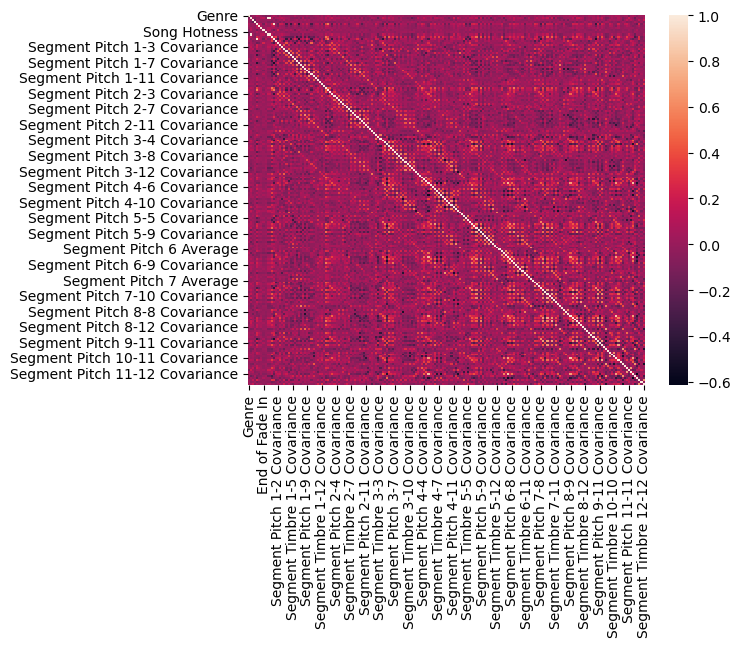

In [10]:
import seaborn as sns

# calculate the correlations
correlations = music_train.corr()

# plot the heatmap 
#sns.heatmap(correlations, xticklabels=correlations.columns, yticklabels=correlations.columns, annot=False)
sns.heatmap(correlations, annot=False)

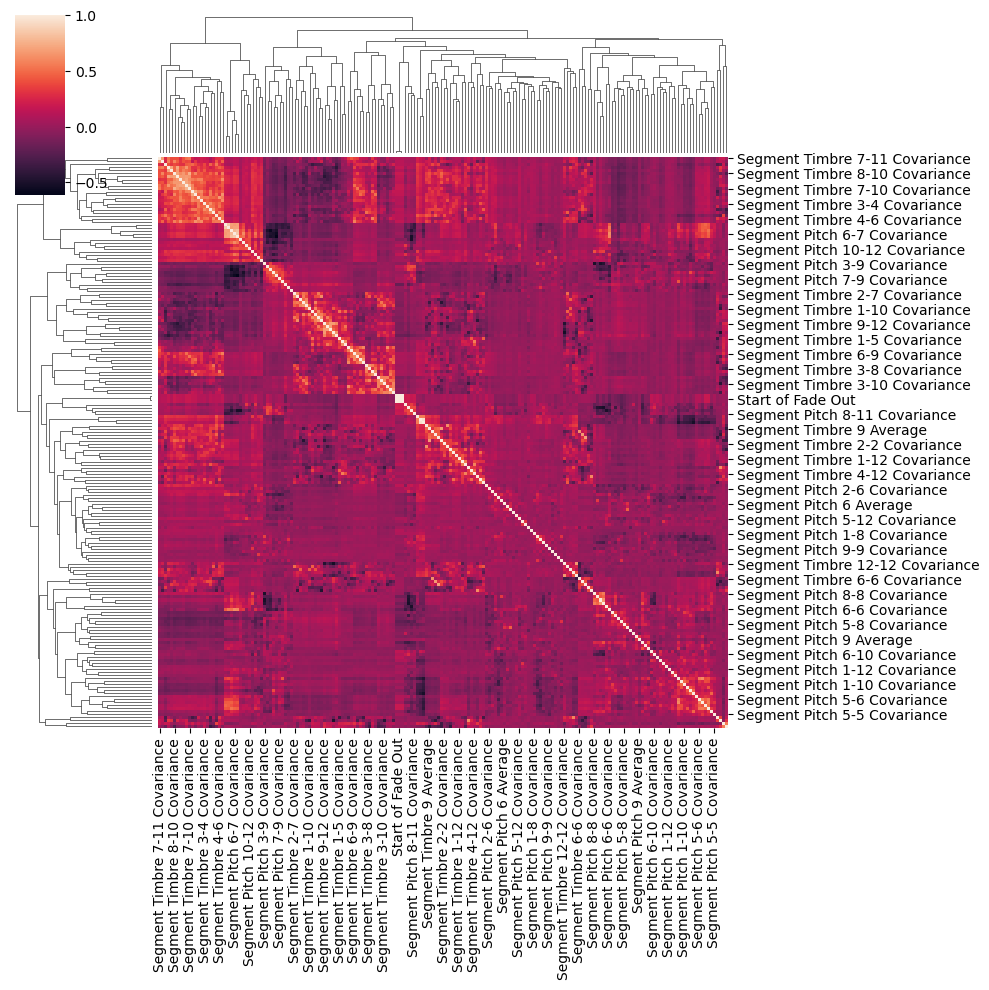

In [11]:
# plot the clustermap 
#sns.clustermap(correlations, xticklabels=correlations.columns, yticklabels=correlations.columns, annot=True)
sns.clustermap(correlations, annot=False)

## Grid Search Feature Selection

In [30]:
from sklearn.pipeline import Pipeline
from sklearn.feature_selection import SelectKBest,f_regression
from sklearn.model_selection import GridSearchCV

pipeline = Pipeline(
    [
     ('selector',SelectKBest(f_regression)),
     ('model',GaussianNB())
    ]
)

search = GridSearchCV(
    estimator = pipeline,
    param_grid = {'selector__k':[3,4,5,6,7,8,9,10]},
    n_jobs=-1,
    scoring="neg_mean_squared_error",
    cv=5,
    verbose=3
)

search.fit(X_train,ytrain_num)
search.best_params_
search.best_score_

Fitting 5 folds for each of 8 candidates, totalling 40 fits


-1806.0184897995907

## Genetic Algorithm Feature Selection

In [16]:
from genetic_selection import GeneticSelectionCV
import numpy as np
estimator = GaussianNB()

model_genetic = GeneticSelectionCV(
        estimator,
        cv=5,
        verbose=1,
        scoring="accuracy",
        max_features=10,
        n_population=50,
        crossover_proba=0.5,
        mutation_proba=0.2,
        n_generations=40,
        crossover_independent_proba=0.5,
        mutation_independent_proba=0.05,
        tournament_size=3,
        n_gen_no_change=10,
        caching=True,
        n_jobs=-1,
    )

model_genetic.fit(X_train, ytrain_num)
print('Features:', (music_train.columns[1:][model_genetic.support_]))
model_genetic.score(X_test, ytest_num)

Selecting features with genetic algorithm.
gen	nevals	avg                            	std                            	min                            	max                               
0  	50    	[ 0.120747  5.74      0.00268 ]	[ 0.012138  2.917602  0.001307]	[ 0.092902  1.        0.000156]	[  0.145386  10.         0.006999]
1  	29    	[-1999.896337     9.12      2000.002299]	[ 4000.051831     4.815143  3999.998851]	[-10000.            3.            0.001529]	[     0.160407     23.        10000.      ]
2  	25    	[-2399.897167     8.88      2400.001734]	[ 4270.889088     3.845205  4270.830327]	[-10000.            3.            0.001241]	[     0.160407     20.        10000.      ]
3  	35    	[-3599.908945     9.96      3600.001579]	[ 4800.068291     4.08392   4799.998816]	[-10000.           4.           0.00111]   	[     0.160407     22.        10000.      ]
4  	25    	[-2599.891472     8.82      2600.001894]	[ 4386.40677      4.217535  4386.341317]	[-10000.            4.            0.0

C:\Users\Tristan\.conda\envs\CPE695\lib\site-packages\sklearn\utils\metaestimators.py:121: FutureWarning: if_delegate_has_method was deprecated in version 1.1 and will be removed in version 1.3. Use available_if instead.
  warnings.warn(


0.17472407896782216

## Confusion Matrix for genetic model

C:\Users\Tristan\.conda\envs\CPE695\lib\site-packages\sklearn\utils\metaestimators.py:121: FutureWarning: if_delegate_has_method was deprecated in version 1.1 and will be removed in version 1.3. Use available_if instead.
  warnings.warn(


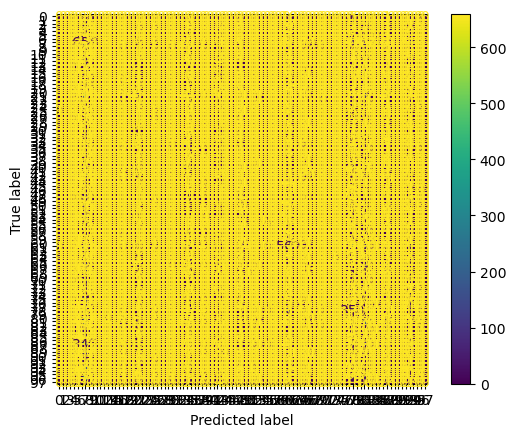

In [23]:
from sklearn.metrics import (
    accuracy_score,
    confusion_matrix,
    ConfusionMatrixDisplay,
    f1_score,
)

y_pred = model_genetic.predict(X_test)
cm = confusion_matrix(ytest_num, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot();

In [ ]:
from sklearn.model_selection import GridSearchCV
  
# defining parameter range
param_grid = {'C': [0.1, 1, 10, 100, 1000], 
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel': ['rbf']} 
  
grid = GridSearchCV(svm.SVC(), param_grid, refit = True, verbose = 3)
  
# fitting the model for grid search
grid.fit(X_train, ytrain_num)

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV 1/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.122 total time=11.4min
[CV 2/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.122 total time=11.3min
[CV 3/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.122 total time=49.9min
[CV 4/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.122 total time=12.2min
[CV 5/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.122 total time=12.0min
[CV 1/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.122 total time=12.4min


In [ ]:
grid.score(X_test, ytest_num)